In [2]:
# Cargar dependencias.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

# Clustering.
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import OneHotEncoder

# Normalizar.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score

# Graficar en 3D.
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')


In [3]:
bd = pd.read_csv("CollegeScorecard.csv")

C:\Users\D3YN3R\AppData\Local\Temp\ipykernel_19172\1563134437.py:1: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  bd = pd.read_csv("CollegeScorecard.csv")


In [4]:
bd.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


#### HIGHDEG 

El grado más alto (HIGHDEG) identifica el nivel de premio más alto que se ofrece en la escuela.

#### CONTROL
Este elemento (CONTROL) identifica si la estructura de gobierno de la institución es pública,
privada sin fines de lucro o privada con fines de lucro.

#### DISTANCEONLY
Las escuelas que se identifican como programas de educación a distancia únicamente (DISTANCEONLY) se identifican con un 1.

#### TUITFTE
Los ingresos netos por matrícula por estudiante equivalente a tiempo completo (TUITFTE,
por sus siglas en inglés) utilizan los ingresos por matrícula menos los descuentos y
asignaciones, y los dividen por el número de estudiantes FTE de pregrado y posgrado.

#### ADM_RATE_ALL
representa la tasa de admisión en todos los campus, definida como el número total de estudiantes universitarios
admitidos en todas las sucursales dividido por el número total de estudiantes universitarios
que presentaron solicitudes en todas las sucursales.

#### NPT4_PUB
universidades públicas; para las instituciones públicas, esta métrica
se limita a los estudiantes universitarios que pagan matrícula estatal, Incluye un promedio ponderado
de todos los estudiantes universitarios que reciben Título IV.

#### NPT4_PRIV
universidades privadas, Incluye un promedio ponderado de todos los estudiantes universitarios que
reciben Título IV.

In [14]:
bd2 = bd[['HIGHDEG','CONTROL','DISTANCEONLY','TUITFTE','ADM_RATE_ALL','NPT4_PUB','NPT4_PRIV']].copy()
bd2.fillna(0,inplace=True)
bd2


,HIGHDEG,CONTROL,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,NPT4_PRIV
0,4,1,0.0,9063.0,0.8989,13415.0,0.0
1,4,1,0.0,9033.0,0.8673,14805.0,0.0
2,4,2,0.0,12057.0,0.0000,0.0,7455.0
3,4,1,0.0,8322.0,0.8062,17520.0,0.0
4,4,1,0.0,7813.0,0.5125,11936.0,0.0
...,...,...,...,...,...,...,...
7799,0,1,0.0,0.0,0.0000,0.0,0.0
7800,0,1,0.0,0.0,0.0000,0.0,0.0
7801,0,1,0.0,0.0,0.0000,0.0,0.0
7802,0,1,0.0,0.0,0.0000,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

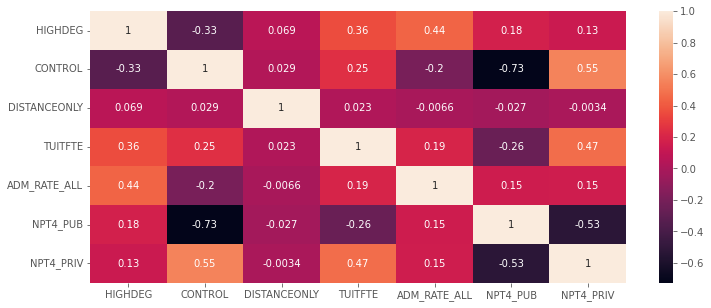

In [15]:
matrix = bd2.corr()
sb.heatmap(matrix, annot=True)
plt.show

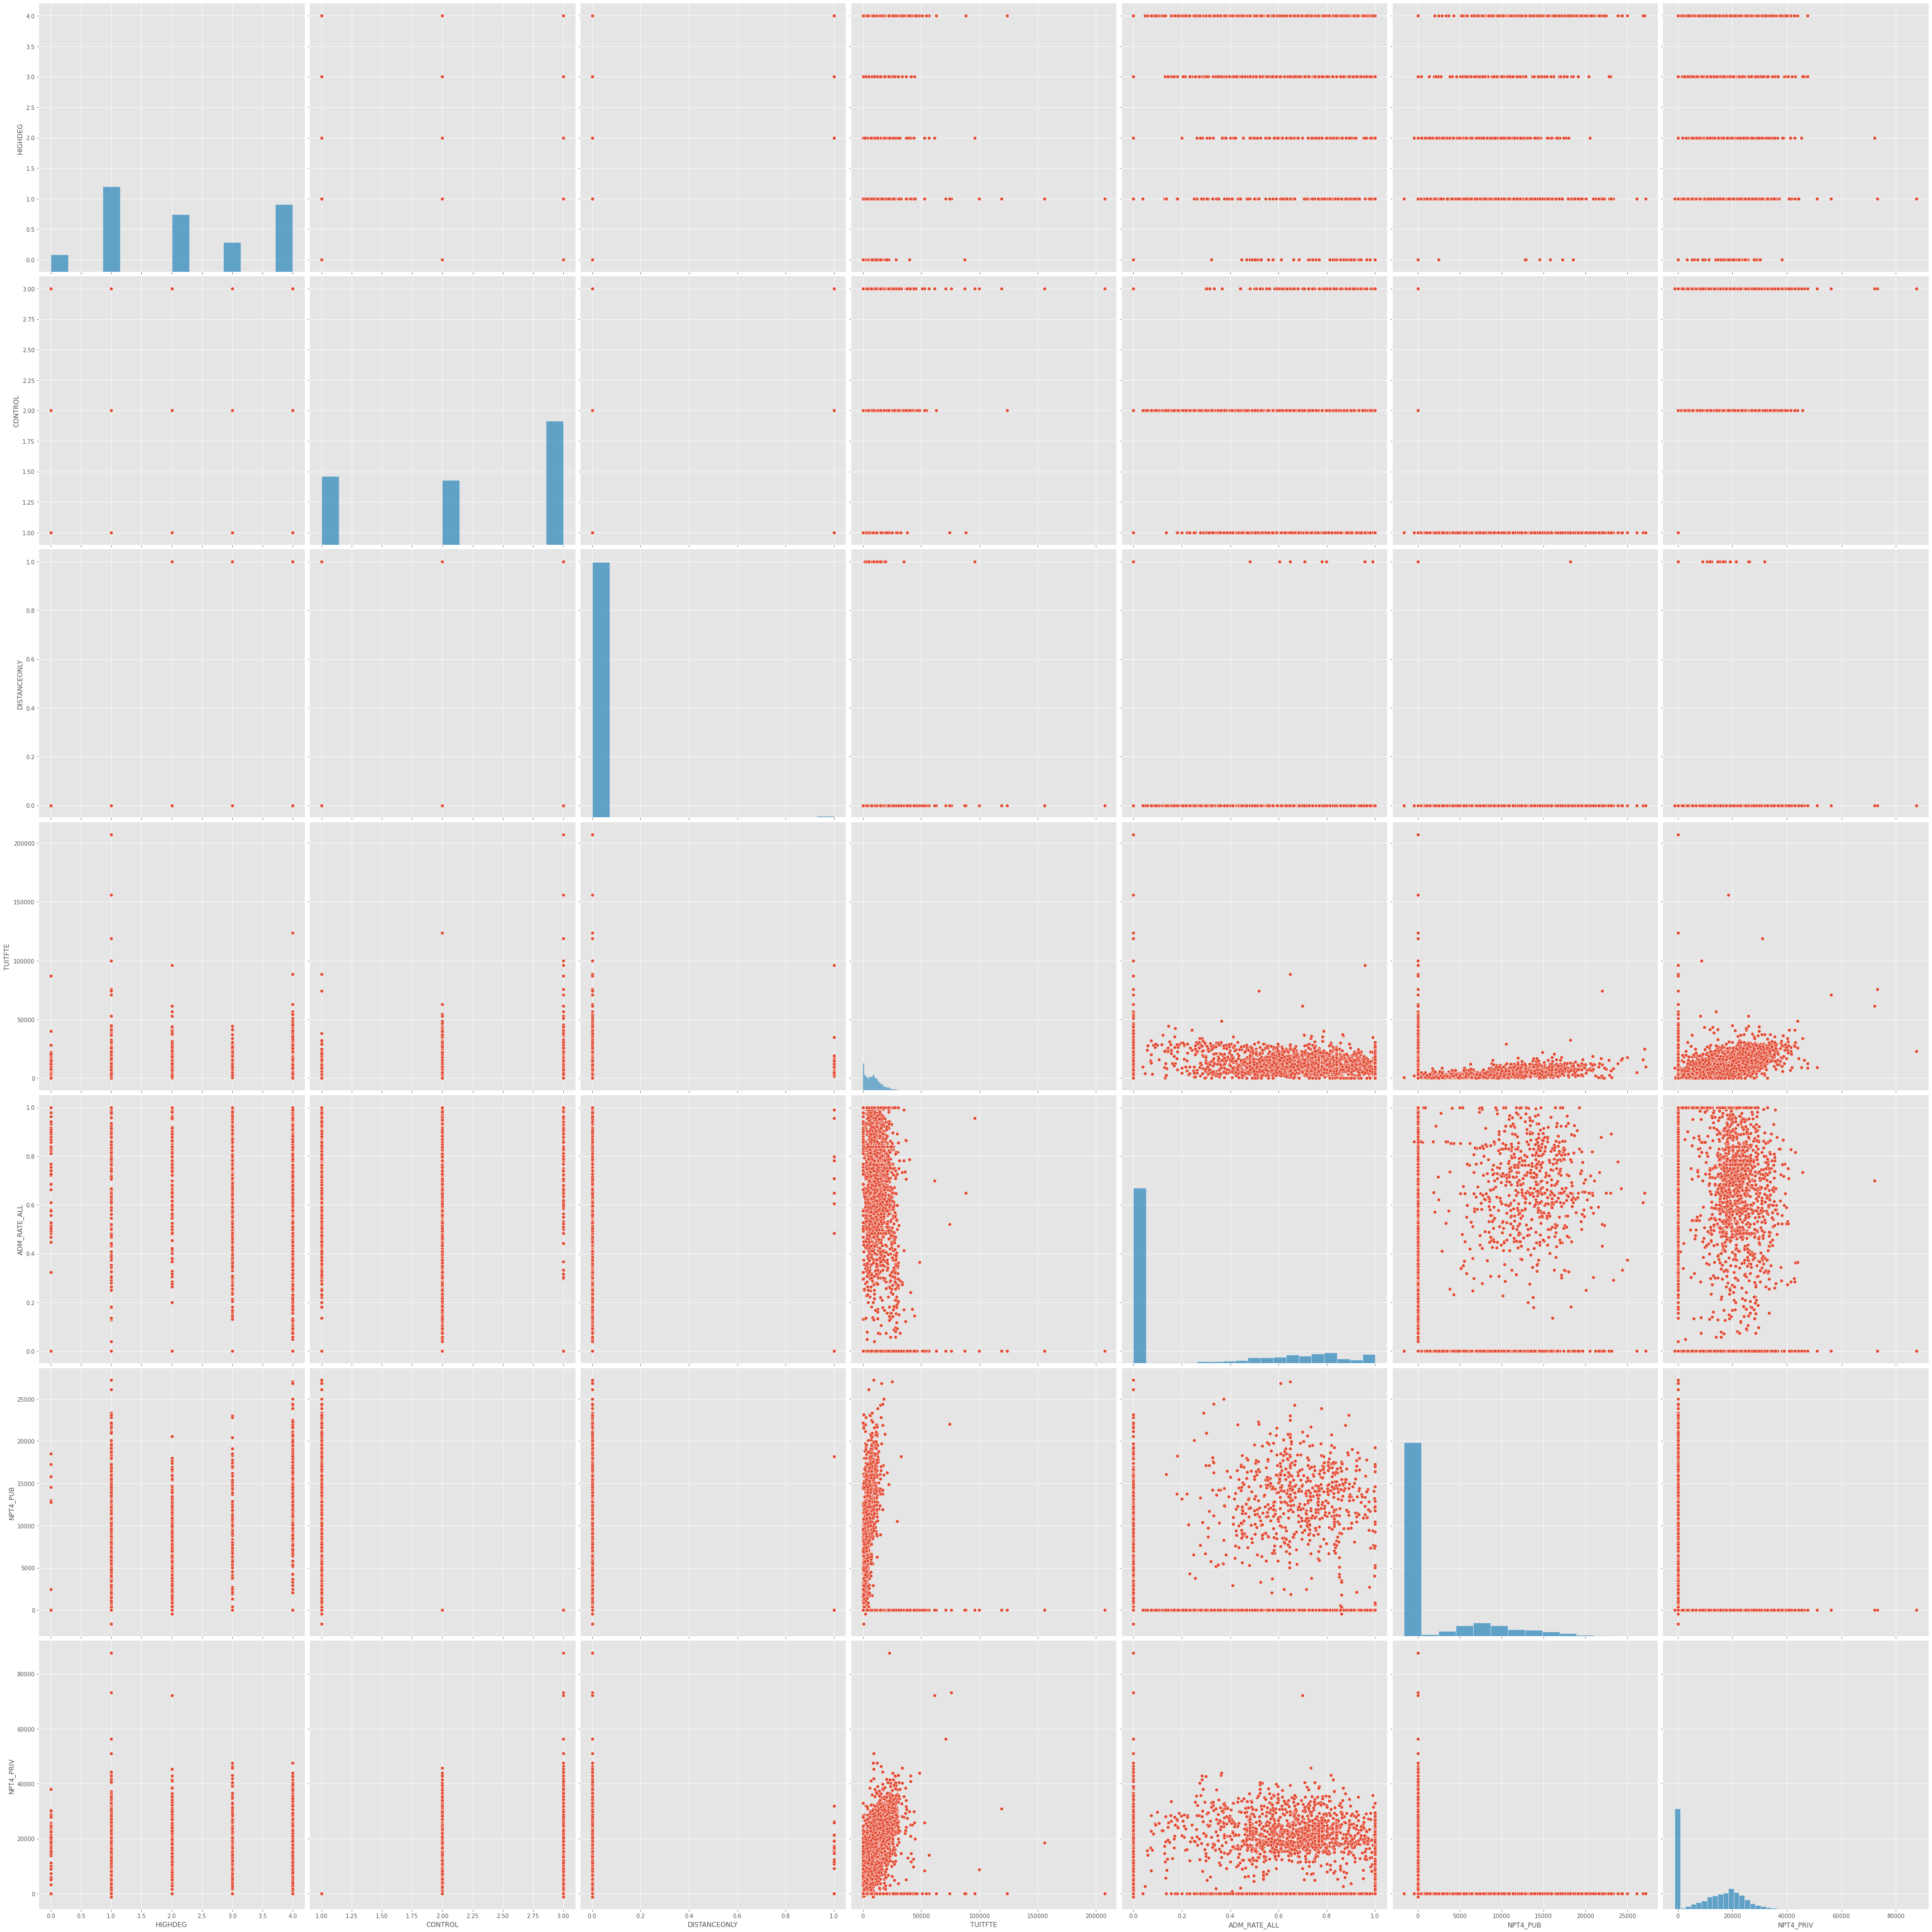

In [16]:
sb.pairplot(bd2.dropna(),
            height=7,
            vars=[
                'HIGHDEG',
                'CONTROL',
                'DISTANCEONLY',
                'TUITFTE',
                'ADM_RATE_ALL',
                'NPT4_PUB',
                'NPT4_PRIV'],
            kind='scatter')
plt.show()

c:\Users\D3YN3R\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


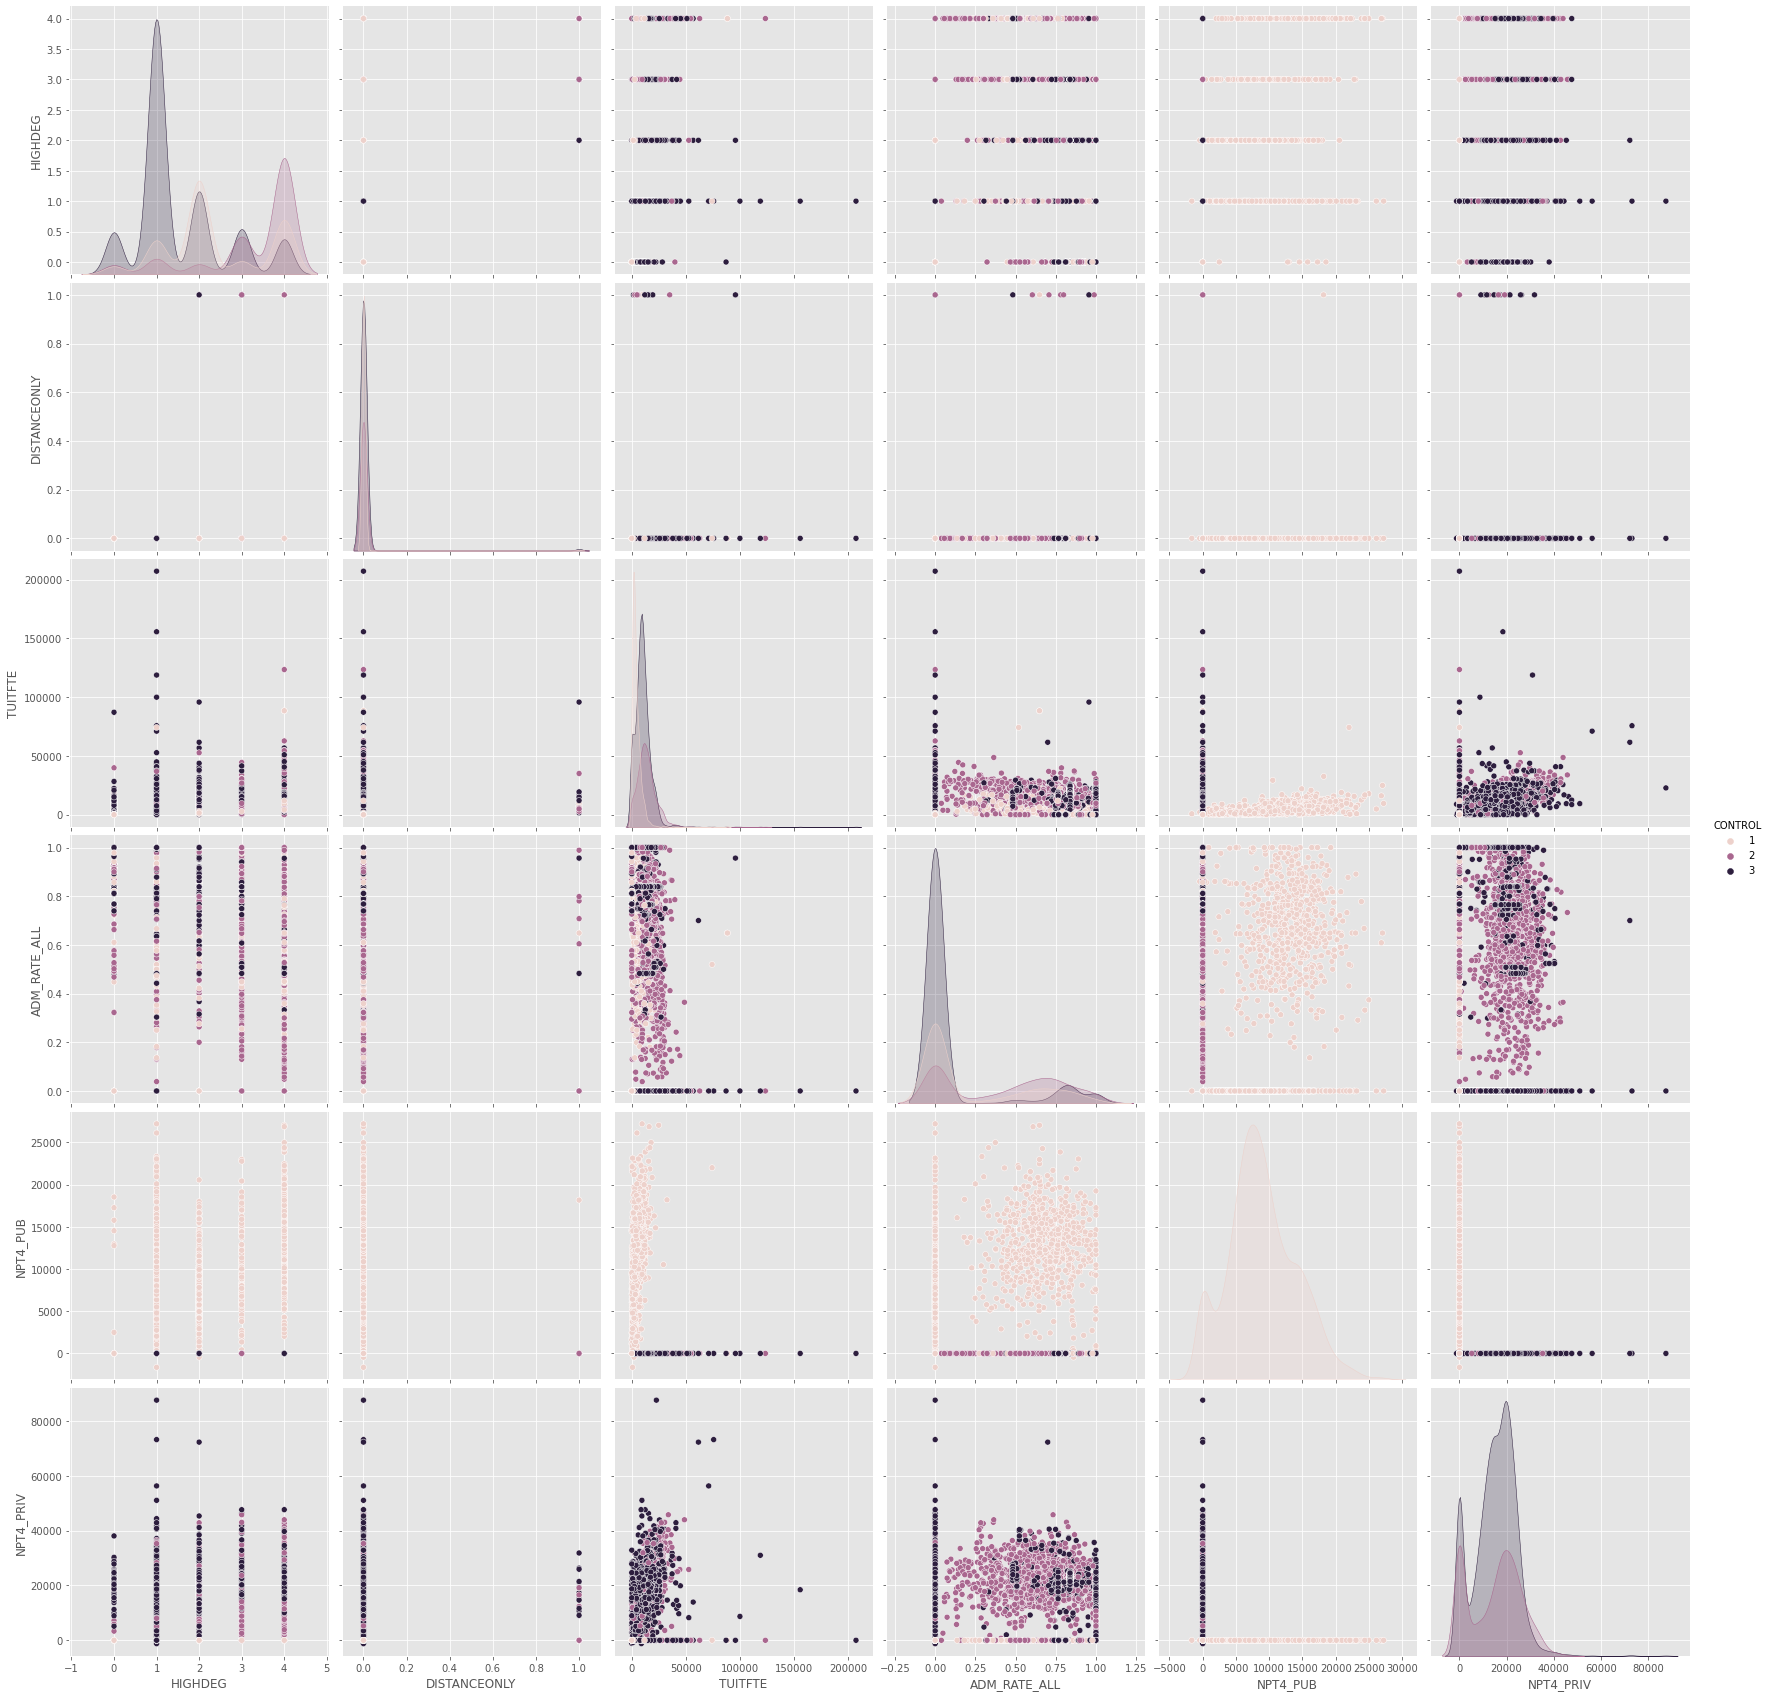

In [18]:
sb.pairplot(bd2.dropna(), hue='CONTROL',size=4,vars=['HIGHDEG',
                'DISTANCEONLY',
                'TUITFTE',
                'ADM_RATE_ALL',
                'NPT4_PUB',
                'NPT4_PRIV'],kind='scatter')

In [23]:
X = np.array(bd2[['HIGHDEG','DISTANCEONLY','TUITFTE','ADM_RATE_ALL','NPT4_PUB','NPT4_PRIV']])
y = np.array(bd2['CONTROL'])
X.shape

(7804, 6)

In [24]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del par�metro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('El m�todo del Codo (The Elbow Method) mostrando el k optimo')
  plt.show()

Valores:  [1592088856407.6733, 763620776340.9733, 591521297876.9075, 473114783194.86255, 386128251790.3293, 311120021484.91235, 260483020833.02094, 232179316673.3962, 206772695417.328, 182840670417.12445, 164236530946.76236, 152900296347.6568, 141925187823.9347, 130240472612.2741, 122754460714.85973]


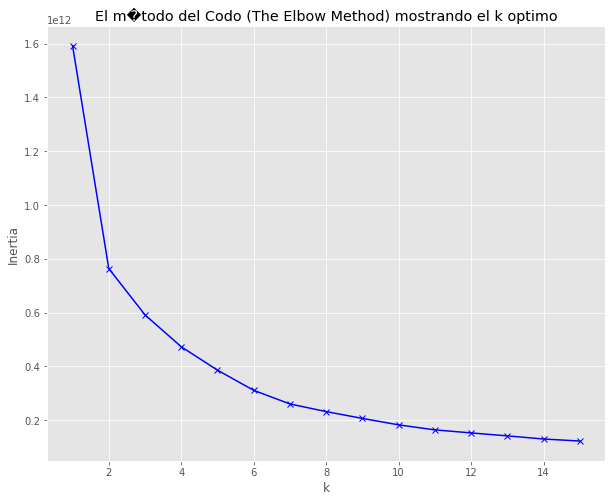

In [25]:
elbow_curve(X, maxClusters = 15)